In [1]:
options(htmltools.dir.version = FALSE)
library(tidyverse)
library(DAAG)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The data set `calif_penn_2011.csv` contains information about the housing stock of California and Pennsylvania, as of 2011.  Information as aggregated into "Census tracts", geographic regions of a few thousand people which are supposed to be fairly homogeneous economically and socially.

1. _Loading and cleaning_

a. Load the data into a dataframe called `ca_pa`.

b. How many rows and columns does the dataframe have?

c. Run this command, and explain, in words, what this does:

```r
colSums(apply(ca_pa,c(1,2),is.na))
```

d. The function `na.omit()` takes a dataframe and returns a new dataframe, omitting any row containing an NA value.  Use it to purge the data set of rows with incomplete data.

e. How many rows did this eliminate?

f. Are your answers in (c) and (e) compatible? Explain.



> Answer:
>
> c. `apply` create a matrix of logical values indicating whether each element is NA, and `colSums` counts the number of NAs in each column.
>
> e. The number of rows eliminated is 670, which is compatible with the number of NAs counted in (c) since the sum of the result from (c) is greater than 670, which is reasonable because some rows may have multiple NAs.

In [ ]:
ca_pa <- read.csv("data/calif_penn_2011.csv")
dim(ca_pa) # 11275 34
ca_pa_cleaned <- na.omit(ca_pa)
# ca_pa_cleaned
col_na <- colSums(apply(ca_pa, c(1, 2), is.na)) # Count of NA values in each column
col_na
nrow(ca_pa) - nrow(ca_pa_cleaned) # 670 rows removed
sum(col_na)

ca_pa <- ca_pa_cleaned


[1] 11275    34

X                     GEO.id2 
                          0                           0 
                    STATEFP                    COUNTYFP 
                          0                           0 
                    TRACTCE                  POPULATION 
                          0                           0 
                   LATITUDE                   LONGITUDE 
                          0                           0 
          GEO.display.label          Median_house_value 
                          0                         599 
                Total_units                Vacant_units 
                          0                           0 
               Median_rooms  Mean_household_size_owners 
                        157                         215 
Mean_household_size_renters         Built_2005_or_later 
                        152                          98 
         Built_2000_to_2004                 Built_1990s 
                         98                          98 
                Built_1980s                 Built_1970s 
                         98                          98 
                Built_1960s                 Built_1950s 
                         98                          98 
                Built_1940s       Built_1939_or_earlier 
                         98                          98 
                 Bedrooms_0                  Bedrooms_1 
                         98                          98 
                 Bedrooms_2                  Bedrooms_3 
                         98                          98 
                 Bedrooms_4          Bedrooms_5_or_more 
                         98                          98 
                     Owners                     Renters 
                        100                         100 
    Median_household_income       Mean_household_income 
                        115                         126

[1] 670

[1] 3034

2. _This Very New House_  

    a. The variable `Built_2005_or_later` indicates the percentage of houses in each Census tract built since 2005.  Plot median house prices against this variable.

    b. Make a new plot, or pair of plots, which breaks this out by state.  Note that the state is recorded in the `STATEFP` variable, with California being state 6 and Pennsylvania state 42.


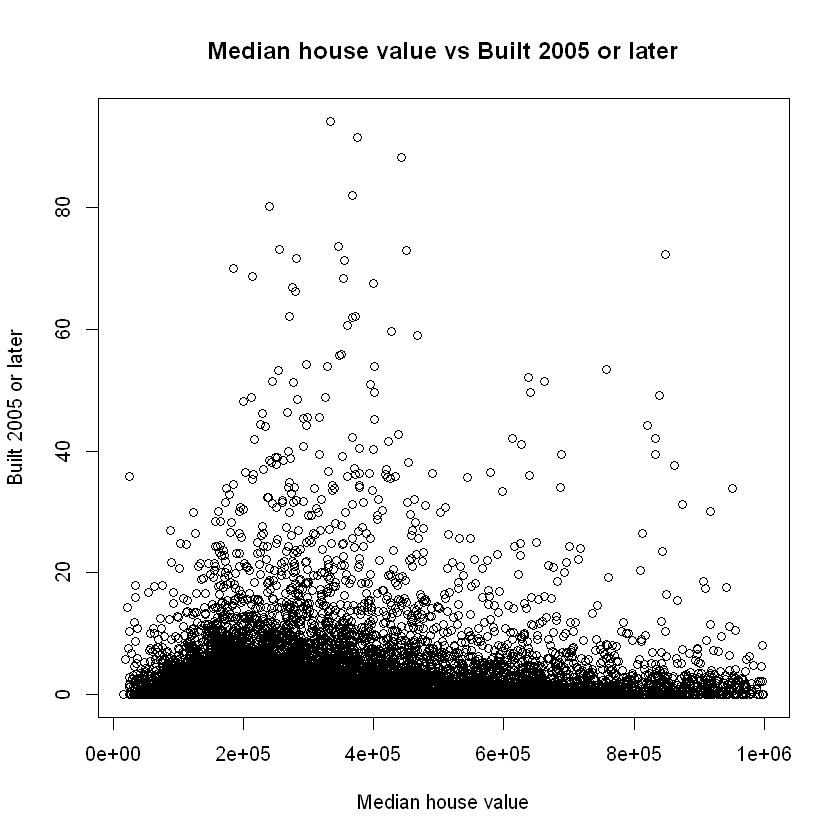

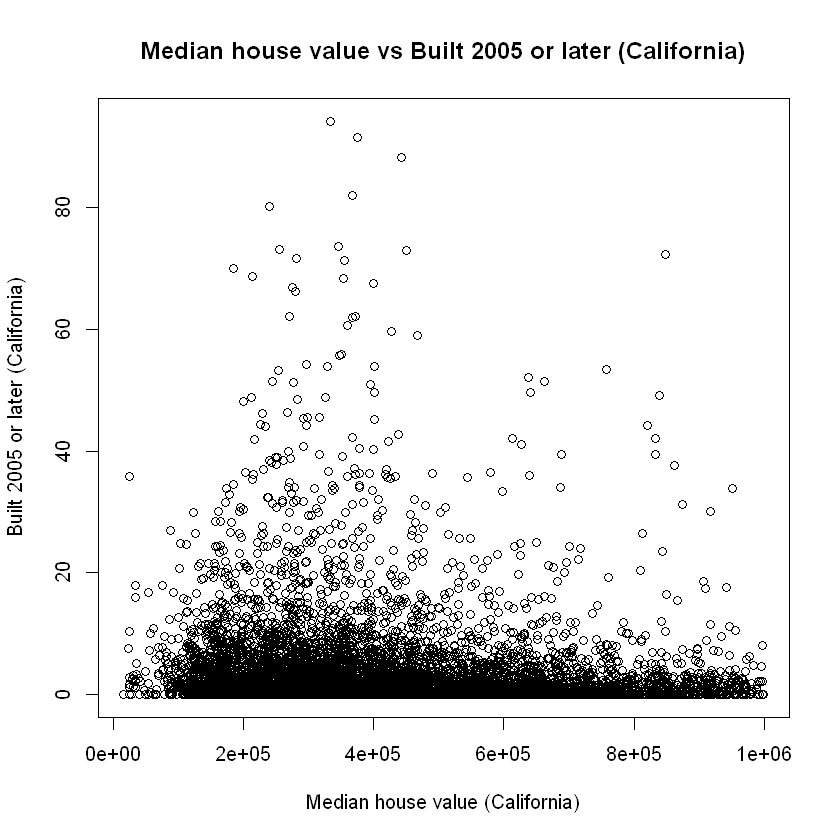

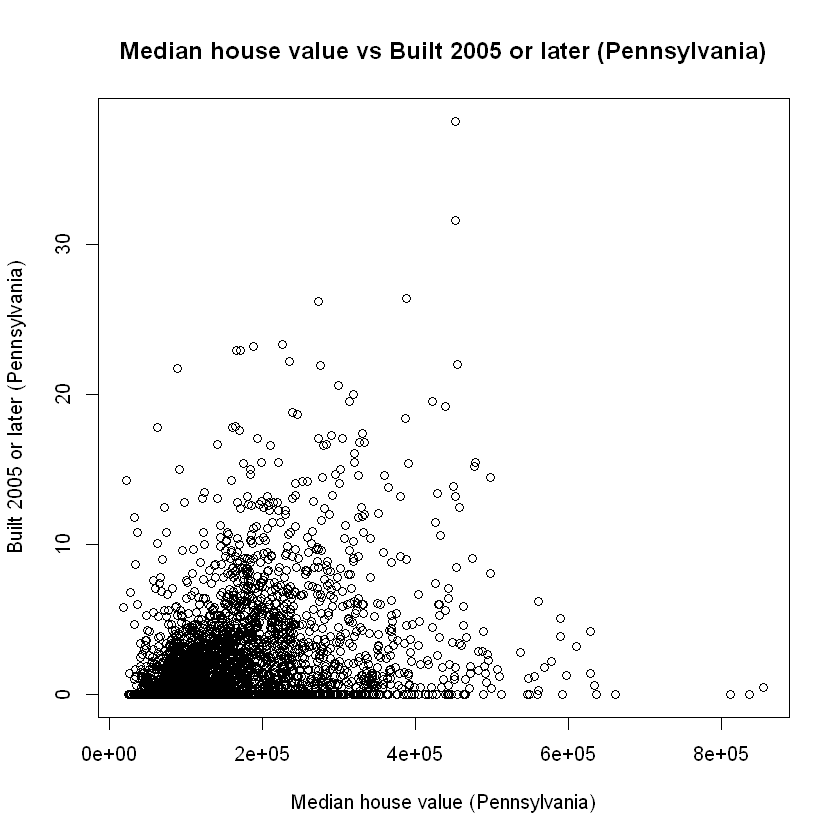

In [3]:
plot(
    ca_pa_cleaned$Median_house_value,
    ca_pa_cleaned$Built_2005_or_later,
    xlab = "Median house value",
    ylab = "Built 2005 or later",
    main = "Median house value vs Built 2005 or later",
)

plot(
    ca_pa_cleaned$Median_house_value[ca_pa_cleaned$STATEFP == 6],
    ca_pa_cleaned$Built_2005_or_later[ca_pa_cleaned$STATEFP == 6],
    xlab = "Median house value (California)",
    ylab = "Built 2005 or later (California)",
    main = "Median house value vs Built 2005 or later (California)",
)

plot(
    ca_pa_cleaned$Median_house_value[ca_pa_cleaned$STATEFP == 42],
    ca_pa_cleaned$Built_2005_or_later[ca_pa_cleaned$STATEFP == 42],
    xlab = "Median house value (Pennsylvania)",
    ylab = "Built 2005 or later (Pennsylvania)",
    main = "Median house value vs Built 2005 or later (Pennsylvania)",
)



3. _Nobody Home_  
The vacancy rate is the fraction of housing units which are not occupied.  The dataframe contains columns giving the total number of housing units for each Census tract, and the number of vacant housing units.  

    a. Add a new column to the dataframe which contains the vacancy rate.  What are the minimum, maximum, mean, and median vacancy rates?

    b. Plot the vacancy rate against median house value.

    c. Plot vacancy rate against median house value separately for California and for Pennsylvania.  Is there a difference?
   

Min,Max,Mean,Median
<dbl>,<dbl>,<dbl>,<dbl>
0,0.965311,0.08888789,0.06767283


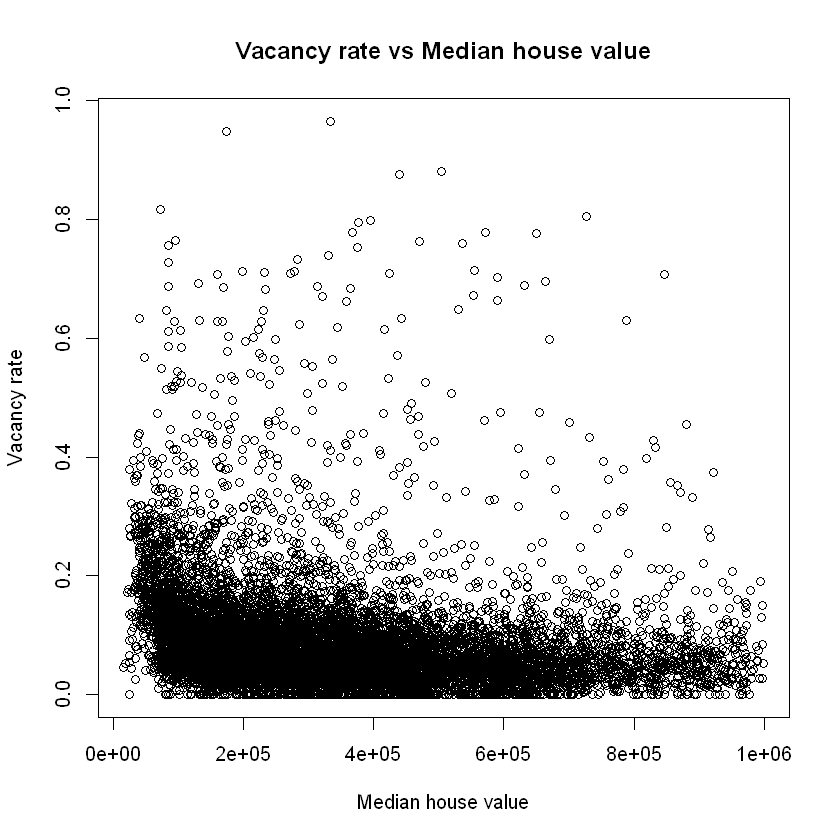

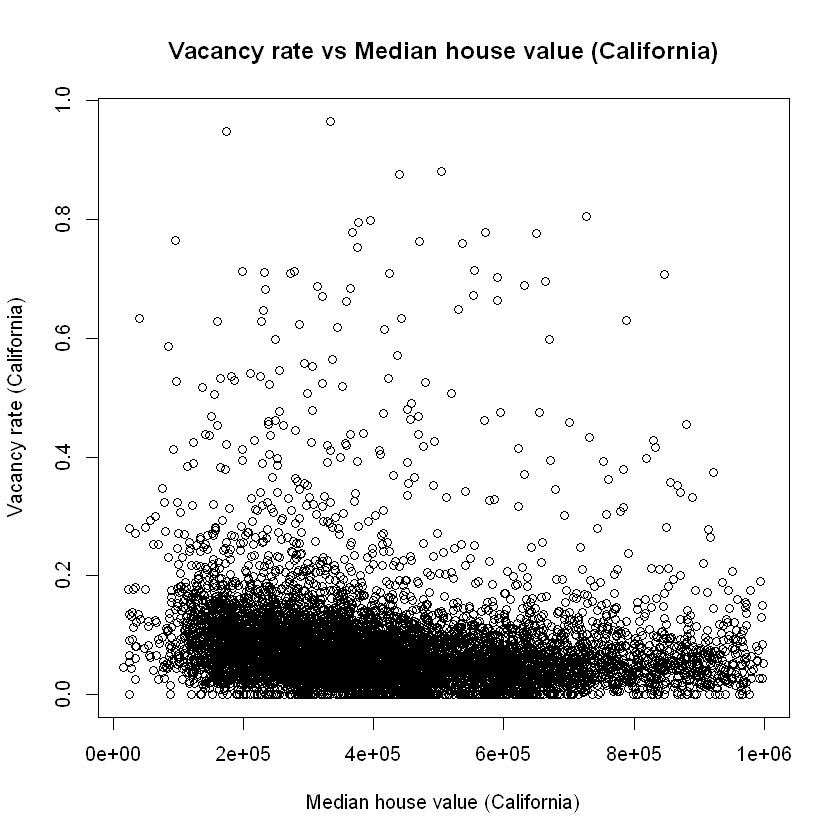

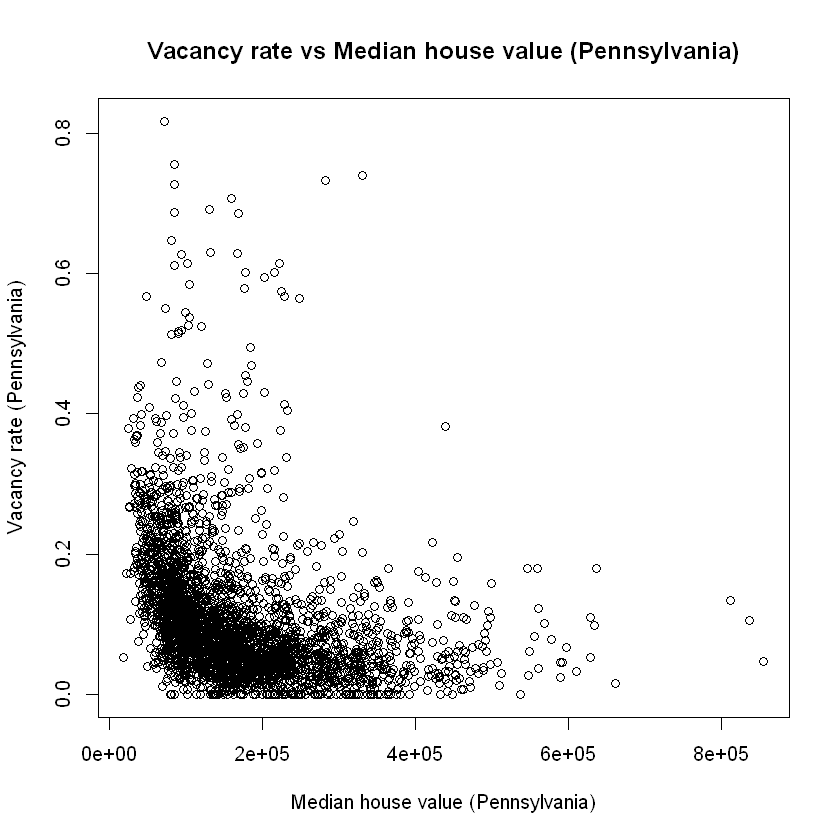

In [4]:
ca_pa_cleaned$Vacancy_rate <- ca_pa_cleaned$Vacant_units / ca_pa_cleaned$Total_units
data.frame(
    Min = min(ca_pa_cleaned$Vacancy_rate, na.rm = TRUE),
    Max = max(ca_pa_cleaned$Vacancy_rate, na.rm = TRUE),
    Mean = mean(ca_pa_cleaned$Vacancy_rate, na.rm = TRUE),
    Median = median(ca_pa_cleaned$Vacancy_rate, na.rm = TRUE)
)
plot(
    ca_pa_cleaned$Median_house_value,
    ca_pa_cleaned$Vacancy_rate,
    xlab = "Median house value",
    ylab = "Vacancy rate",
    main = "Vacancy rate vs Median house value"
)

plot(
    ca_pa_cleaned$Median_house_value[ca_pa_cleaned$STATEFP == 6],
    ca_pa_cleaned$Vacancy_rate[ca_pa_cleaned$STATEFP == 6],
    xlab = "Median house value (California)",
    ylab = "Vacancy rate (California)",
    main = "Vacancy rate vs Median house value (California)"
)

plot(
    ca_pa_cleaned$Median_house_value[ca_pa_cleaned$STATEFP == 42],
    ca_pa_cleaned$Vacancy_rate[ca_pa_cleaned$STATEFP == 42],
    xlab = "Median house value (Pennsylvania)",
    ylab = "Vacancy rate (Pennsylvania)",
    main = "Vacancy rate vs Median house value (Pennsylvania)"
)


> Answer:
>
> Difference: The vacancy rate is much higher in Pennsylvania than in California when the median house value is low.

 
4. The column `COUNTYFP` contains a numerical code for counties within each state.  We are interested in Alameda County (county 1 in California), Santa Clara (county 85 in California), and Allegheny County (county 3 in Pennsylvania).

    a. Explain what the block of code at the end of this question is supposed to accomplish, and how it does it.

    b. Give a single line of R which gives the same final answer as the block of code.  Note: there are at least two ways to do this; you just have to find one.

    c. For Alameda, Santa Clara and Allegheny Counties, what were the average percentages of housing built since 2005?

    d. The `cor` function calculates the correlation coefficient between two variables.  What is the correlation between median house value and the percent of housing built since 2005 in (i) the whole data, (ii) all of California, (iii) all of Pennsylvania, (iv) Alameda County, (v) Santa Clara County and (vi) Allegheny County?
    
    e. Make three plots, showing median house values against median income, for Alameda, Santa Clara, and Allegheny Counties.  (If you can fit the information into one plot, clearly distinguishing the three counties, that's OK too.)

In [ ]:
acca <- c()
for (tract in 1:nrow(ca_pa)) {
  if (ca_pa$STATEFP[tract] == 6) {
    if (ca_pa$COUNTYFP[tract] == 1) {
      acca <- c(acca, tract)
    }
  }
}
accamhv <- c()
for (tract in acca) {
  accamhv <- c(accamhv, ca_pa[tract, 10])
}
median(accamhv)


[1] 474050

> Answer:
>
> Question 4a:
> It calculates the median house value for each Census tract in Alameda County (California) and returns the median value.
> It uses a for-loop to iterate through each row of the dataframe `ca_pa`, checking if the state is California (STATEFP == 6) and the county is Alameda (COUNTYFP == 1). If both conditions are met, it extracts the median house value for that row.
> The final result is the median house value for Alameda County. 

In [ ]:
# Question 4b
median(ca_pa$Median_house_value[ca_pa$STATEFP == 6 & ca_pa$COUNTYFP == 1], na.rm = TRUE)


[1] 474050

In [23]:
# Question 4c

ca_pa$County <- case_when(
    ca_pa$STATEFP == 6 & ca_pa$COUNTYFP == 1 ~ "Alameda",
    ca_pa$STATEFP == 6 & ca_pa$COUNTYFP == 85 ~ "Santa Clara",
    ca_pa$STATEFP == 42 & ca_pa$COUNTYFP == 3 ~ "Allegheny",
    TRUE ~ "Other"
)

county_avg <- ca_pa %>%
    filter(County != "Other") %>%
    group_by(County) %>%
    summarise(Avg_Built_2005 = mean(Built_2005_or_later, na.rm = TRUE))

county_avg


County,Avg_Built_2005
<chr>,<dbl>
Alameda,2.820468
Allegheny,1.474219
Santa Clara,3.200319


In [26]:
# Question 4d
calc_cor <- function(data) {
    cor(data$Median_house_value, data$Built_2005_or_later, use = "complete.obs")
}

cor_results <- list(
    "Whole Data" = calc_cor(ca_pa),
    "California" = calc_cor(filter(ca_pa, STATEFP == 6)),
    "Pennsylvania" = calc_cor(filter(ca_pa, STATEFP == 42)),
    "Alameda" = calc_cor(filter(ca_pa, STATEFP == 6, COUNTYFP == 1)),
    "Santa Clara" = calc_cor(filter(ca_pa, STATEFP == 6, COUNTYFP == 85)),
    "Allegheny" = calc_cor(filter(ca_pa, STATEFP == 42, COUNTYFP == 3))
)

cor_df <- data.frame(
    Region = names(cor_results),
    Correlation = round(unlist(cor_results), 3)
)

cor_df


,Region,Correlation
,<chr>,<dbl>
Whole Data,Whole Data,-0.019
California,California,-0.115
Pennsylvania,Pennsylvania,0.268
Alameda,Alameda,0.013
Santa Clara,Santa Clara,-0.173
Allegheny,Allegheny,0.194


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


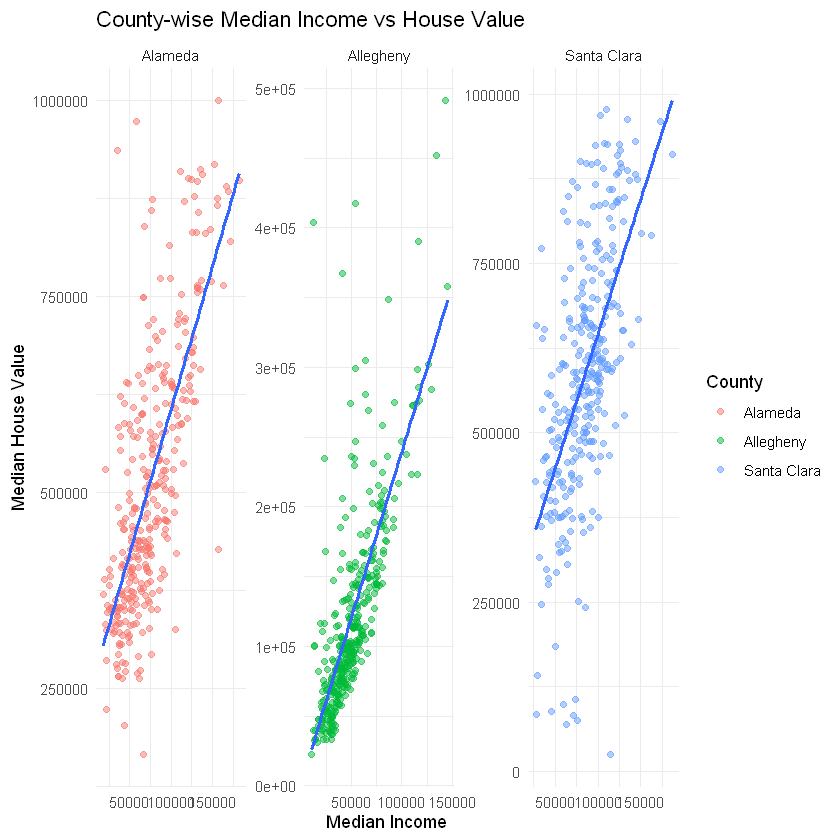

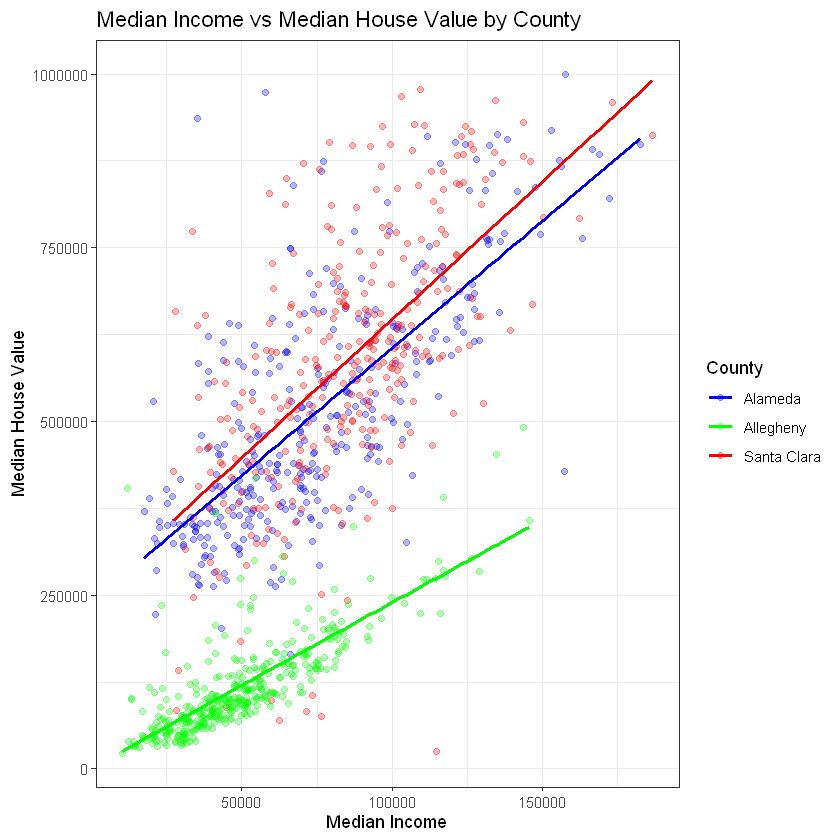

In [29]:
three_counties <- ca_pa %>%
    filter(County %in% c("Alameda", "Santa Clara", "Allegheny"))

ggplot(three_counties, aes(x = Median_household_income, y = Median_house_value)) +
    geom_point(alpha = 0.5, aes(color = County)) +
    geom_smooth(method = "lm", se = FALSE) +
    facet_wrap(~County, scales = "free") +
    labs(
        title = "County-wise Median Income vs House Value",
        x = "Median Income",
        y = "Median House Value",
    ) +
    theme_minimal()

ggplot(three_counties, aes(x = Median_household_income, y = Median_house_value, color = County)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method = "lm", se = FALSE) +
    labs(
        title = "Median Income vs Median House Value by County",
        x = "Median Income",
        y = "Median House Value"
    ) +
    scale_color_manual(values = c("Alameda" = "blue", "Santa Clara" = "red", "Allegheny" = "green")) +
    theme_bw()


MB.Ch1.11. Run the following code:

In [6]:
gender <- factor(c(rep("female", 91), rep("male", 92)))
table(gender)
gender <- factor(gender, levels = c("male", "female"))
table(gender)
gender <- factor(gender, levels = c("Male", "female"))
# Note the mistake: "Male" should be "male"
table(gender)
table(gender, exclude = NULL)
rm(gender) # Remove gender


gender
female   male 
    91     92 

gender
  male female 
    92     91 

gender
  Male female 
     0     91 

gender
  Male female   <NA> 
     0     91     92 

Explain the output from the successive uses of table().
    

> Answer:
> 
> 1. For the first `table()`, it created a factor with 91 "female" and 92 "male", and the levels are sorted alphabetically by default.
> 2. The second `table()` explicitly sets the levels to "male" and "female", and automatically sorts them in that order.
> 3. The "Male" should be "male", so the third `table()` is incorrect because the original "male" factor cannot match the new name "Male". Thus, this column is 0.
> 4. The fourth `table()` does not exclude NA, so it counts the NA values as well, resulting in 92 NAs as the original "male" factor

 
MB.Ch1.12. Write a function that calculates the proportion of values in a vector x that exceed some value cutoff.

(a) Use the sequence of numbers 1, 2, . . . , 100 to check that this function gives the result that is expected.

In [ ]:
proportion_above <- function(x, cutoff) {
    mean(x > cutoff, na.rm = TRUE)
}

test_vec <- 1:100

proportion_above(test_vec, 50) # Should return 0.5
proportion_above(test_vec, 75) # Should return 0.25
proportion_above(test_vec, 100) # Should return 0.0
proportion_above(test_vec, 0) # Should return 1.0


[1] 0.5

[1] 0.25

[1] 0

[1] 1

(b) Obtain the vector ex01.36 from the Devore6 (or Devore7) package. These data give the times required for individuals to escape from an oil platform during a drill. Use dotplot() to show the distribution of times. Calculate the proportion of escape times that exceed 7 minutes.

[1] 0.03846154

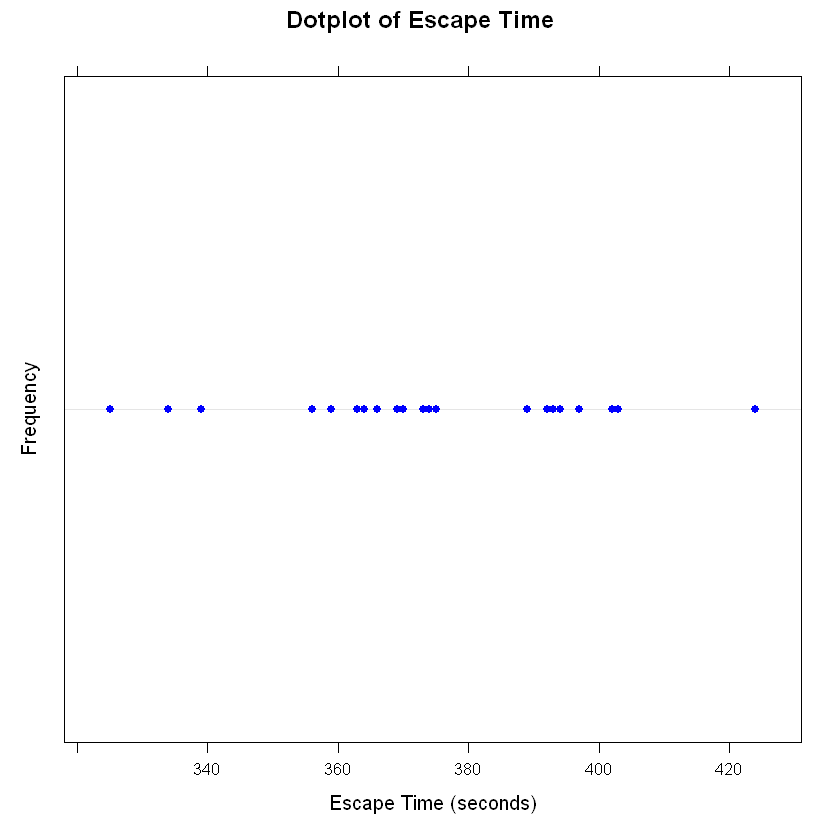

In [38]:
library(Devore7)

data(ex01.36)
esc_time <- ex01.36$C1

dotplot(esc_time,
    main = "Dotplot of Escape Time",
    xlab = "Escape Time (seconds)",
    ylab = "Frequency",
    pch = 19, col = "blue"
)

proportion_above(esc_time, 7 * 60)


MB.Ch1.18. The Rabbit data frame in the MASS library contains blood pressure change measurements on five rabbits (labeled as R1, R2, . . . ,R5) under various control and treatment conditions. Read the help file for more information. Use the `unstack()` function (three times) to convert Rabbit to the following form:

Treatment Dose   R1   R2   R3   R4   R5 

1 Control 6.25  0.50 1.00 0.75 1.25 1.5 

2 Control 12.50 4.50 1.25 3.00 1.50 1.5 

....

In [66]:
library(MASS)
data(Rabbit)

control_data <- subset(Rabbit, Treatment == "Control")
mdl_data <- subset(Rabbit, Treatment == "MDL")

control_wide <- unstack(control_data, BPchange ~ Animal)
mdl_wide <- unstack(mdl_data, BPchange ~ Animal)

control_wide$Dose <- unique(control_data$Dose)
mdl_wide$Dose <- unique(mdl_data$Dose)

control_wide$Treatment <- "Control"
mdl_wide$Treatment <- "MDL"


final_data <- rbind(control_wide, mdl_wide)
final_data <- final_data[, c("Treatment", "Dose", "R1", "R2", "R3", "R4", "R5")]

final_data


Treatment,Dose,R1,R2,R3,R4,R5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,6.25,0.50,1.00,0.75,1.25,1.5
Control,12.50,4.50,1.25,3.00,1.50,1.5
Control,25.00,10.00,4.00,3.00,6.00,5.0
Control,50.00,26.00,12.00,14.00,19.00,16.0
Control,100.00,37.00,27.00,22.00,33.00,20.0
Control,200.00,32.00,29.00,24.00,33.00,18.0
MDL,6.25,1.25,1.40,0.75,2.60,2.4
MDL,12.50,0.75,1.70,2.30,1.20,2.5
MDL,25.00,4.00,1.00,3.00,2.00,1.5
